In [30]:
# Decision Tree Algorithm on Lung Cancer Dataset

In [13]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
pima = pd.read_csv("D:\MIT IMP\MP\mp last\datasets\lung_cancer.csv")

In [15]:
pima.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [16]:
#split dataset in features and target variable
feature_cols = ['Age', 'Smokes', 'AreaQ', 'Alkhol']
X = pima[feature_cols] # Features
y = pima.Result # Target variable

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


In [20]:
pip install graphviz

In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade scikit-learn

     ---------------------------------------- 9.3/9.3 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Decision Tree Pros
# Decision trees are easy to interpret and visualize.
# It can easily capture Non-linear patterns.
# It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
# It can be used for feature engineering such as predicting missing values, suitable for variable selection.
# The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)


# Decision Tree Cons
# Sensitive to noisy data. It can overfit noisy data.
# The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
# Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

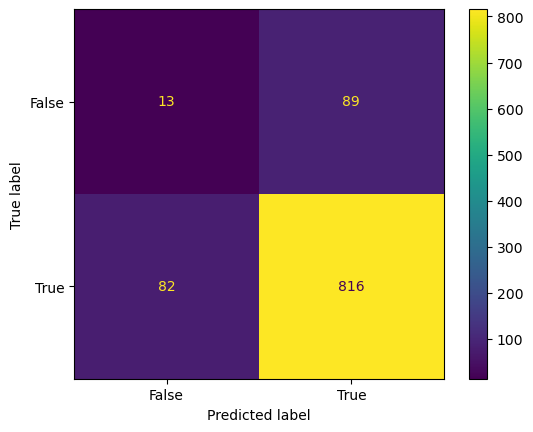

In [31]:
import matplotlib.pyplot as plt
import numpy

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()